<a href="https://colab.research.google.com/github/AkshitGarg054/customer-churn-prediction/blob/main/churn_predict_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Projects/customer_churn.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df = df.drop('customerID', axis = 'columns')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes # we need to convert everything to numeric

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df.TotalCharges.values # this is in string format

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
pd.to_numeric(df.TotalCharges, errors = "coerce")  # coerce handles the ' ' values

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
pd.to_numeric(df.TotalCharges, errors = "coerce").isnull().sum() # we need to remove these null values

np.int64(11)

In [ ]:
df1 = df[df.TotalCharges != ' '].copy() # null values removed

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [ ]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


<h2 style="font-size: 25px;">VISUALS :</h2>


Churn
No     5163
Yes    1869
Name: count, dtype: int64


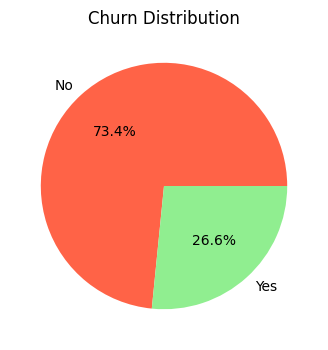

In [ ]:
churn_count = df1['Churn'].value_counts()
print(churn_count)

plt.figure(figsize=(4, 4))
plt.pie(churn_count, labels = churn_count.index, autopct='%1.1f%%', colors=['#FF6347', '#90EE90'])
plt.title('Churn Distribution')
plt.show()

gender
Male      3549
Female    3483
Name: count, dtype: int64


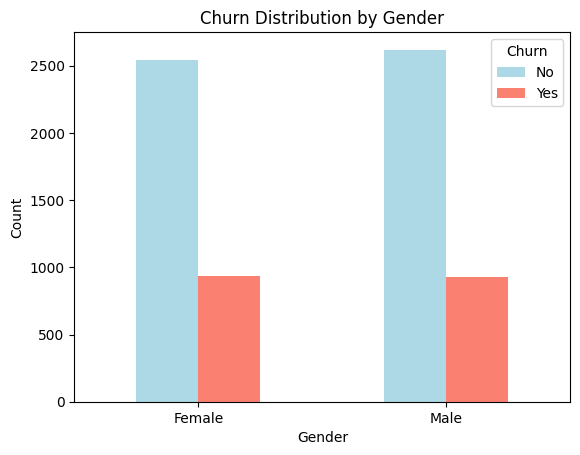

Churn     No  Yes
gender           
Female  2544  939
Male    2619  930


In [ ]:
gender_count = df1['gender'].value_counts()
print(gender_count)
gender_churn = pd.crosstab(df1['gender'], df1['Churn'])
gender_churn.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print(gender_churn) # The plot shows equal distribution. So, gender does not appear to be a strong factor influencing churn.

Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476


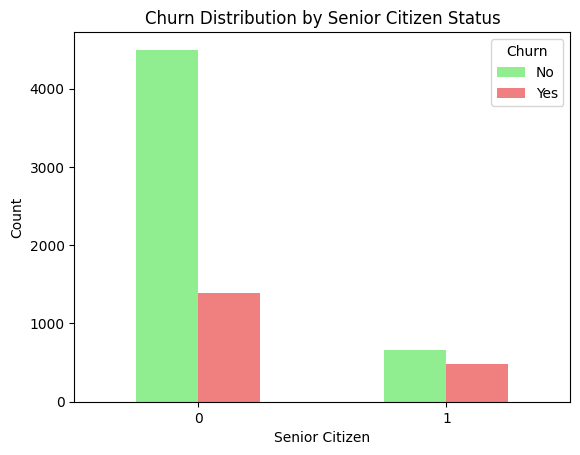

In [ ]:
senior_churn = pd.crosstab(df1['SeniorCitizen'], df1['Churn'])
print(senior_churn)

senior_churn.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Churn Distribution by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

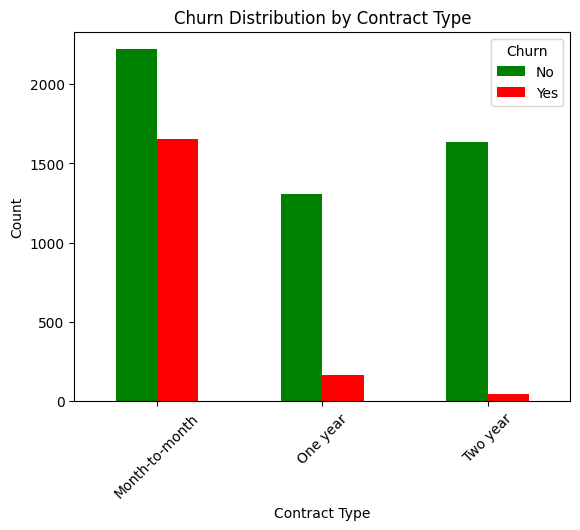

In [ ]:
contract_churn = pd.crosstab(df1['Contract'], df1['Churn'])
contract_churn.plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

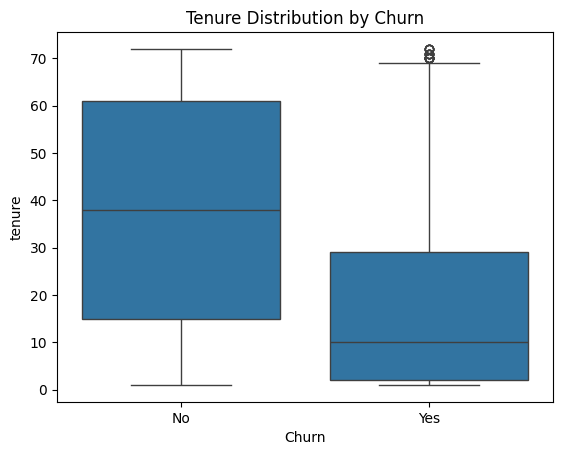

In [ ]:
sns.boxplot(x ='Churn', y ='tenure', data = df1)
plt.title('Tenure Distribution by Churn')
plt.show() # Long-term customers are less likely to churn
#A few customers who churned have relatively high tenure (above ~60 months), indicated by the dots — these are OUTLIERS

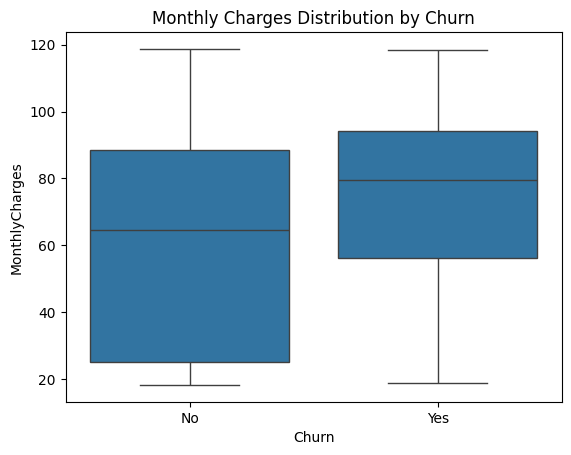

In [ ]:
sns.boxplot(x ='Churn', y ='MonthlyCharges', data = df1)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

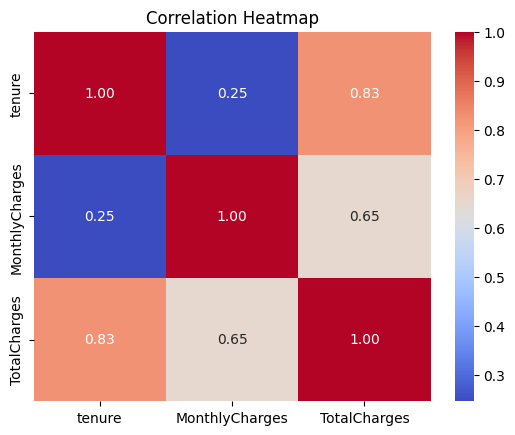

In [ ]:
corr = df1[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<h1 style="font-size: 25px;">Encoding Categorical Variables</h1>

In [ ]:
def unique_col_vals(df):
    for col in df:
        print(f'{col} : {df[col].unique()}')

In [ ]:
unique_col_vals(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
df1 = df1.replace('No internet service', 'No').infer_objects(copy=False)
df1 = df1.replace('No phone service', 'No').infer_objects(copy=False)

In [ ]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col] = df1[col].replace({'Yes' : 1, 'No' : 0}).infer_objects(copy=False)

<ipython-input-43-2f3b6869296a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col] = df1[col].replace({'Yes' : 1, 'No' : 0}).infer_objects(copy=False)


In [ ]:
df1['gender'] = df1['gender'].replace({'Female' : 1, 'Male' : 0}).infer_objects(copy=False)

<ipython-input-44-fb9c9decd1c1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'] = df1['gender'].replace({'Female' : 1, 'Male' : 0}).infer_objects(copy=False)


In [ ]:
unique_col_vals(df1)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])

In [ ]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3367,0,0,0,0,52,1,1,1,1,1,...,True,False,False,False,False,True,False,False,False,True
992,1,0,1,1,22,1,1,0,0,0,...,False,False,True,False,False,True,False,True,False,False
6306,0,0,0,0,71,1,1,1,1,1,...,False,True,False,False,True,False,True,False,False,False
2763,0,0,1,1,64,1,0,1,1,0,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
true_false_columns = ['InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for col in true_false_columns:
    df2[col] = df2[col].replace({True : 1, False : 0}).infer_objects(copy=False)

<ipython-input-49-a1d78cc66247>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col] = df2[col].replace({True : 1, False : 0}).infer_objects(copy=False)


In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3255,1,1,1,1,66,1,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
2220,0,0,1,0,72,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
6887,1,0,1,1,35,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3011,1,0,1,1,9,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


<h1 style="font-size: 25px;">HANDLING IMBALANCED DATA :</h1>


In [ ]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

,count
Churn,
0,5163
1,5163


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 5, stratify = y_sm)

In [ ]:
y_train.value_counts()

,count
Churn,
0,4130
1,4130


In [ ]:
y_test.value_counts()

,count
Churn,
1,1033
0,1033


<h1 style="font-size: 25px;">FEATURE SCALING :</h1>

In [ ]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

<h1 style="font-size: 25px;">DATA EXPLORATION AFTER DATA PREPROCESSING </h1>

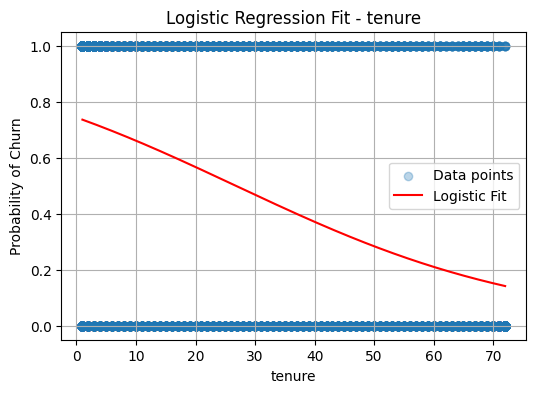

In [ ]:
from sklearn.linear_model import LogisticRegression

feature = 'tenure'

X_feat = X_train[[feature]]
y_bin = y_train


model = LogisticRegression()
model.fit(X_feat, y_bin)

# Generate values for plotting
X_range = np.linspace(X_feat.min(), X_feat.max(), 300).reshape(-1, 1) #scikit-learn models expect 2D arrays, therefore reshape
X_range_df = pd.DataFrame(X_range, columns=[feature])
y_probs = model.predict_proba(X_range_df)[:, 1] # [:, 1] gives the probability that the prediction is 1 (positive class)

plt.figure(figsize=(6, 4))
plt.scatter(X_feat, y_bin, alpha=0.3, label="Data points")
plt.plot(X_range, y_probs, color='red', label="Logistic Fit")
plt.xlabel(feature)
plt.ylabel("Probability of Churn")
plt.title(f"Logistic Regression Fit - {feature}")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import pointbiserialr

y_train_binary = y_train

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_features:
    corr, p_value = pointbiserialr(X_train[col], y_train_binary)
    print(f"Correlation between {col} and Churn: {corr:.3f}, p-value: {p_value:.3f}")

Correlation between gender and Churn: -0.138, p-value: 0.000
Correlation between SeniorCitizen and Churn: 0.022, p-value: 0.050
Correlation between Partner and Churn: -0.306, p-value: 0.000
Correlation between Dependents and Churn: -0.313, p-value: 0.000
Correlation between tenure and Churn: -0.420, p-value: 0.000
Correlation between PhoneService and Churn: -0.017, p-value: 0.123
Correlation between MultipleLines and Churn: -0.059, p-value: 0.000
Correlation between OnlineSecurity and Churn: -0.310, p-value: 0.000
Correlation between OnlineBackup and Churn: -0.212, p-value: 0.000
Correlation between DeviceProtection and Churn: -0.193, p-value: 0.000
Correlation between TechSupport and Churn: -0.307, p-value: 0.000
Correlation between StreamingTV and Churn: -0.040, p-value: 0.000
Correlation between StreamingMovies and Churn: -0.023, p-value: 0.039
Correlation between PaperlessBilling and Churn: 0.131, p-value: 0.000
Correlation between MonthlyCharges and Churn: 0.229, p-value: 0.000
Co

<h1 style="font-size: 25px;">LOGISTIC REGRESSION -</h1>

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 42, max_iter = 8000)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

# Evaluate
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
classification_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(classification_report_log_reg)
print("Accuracy : ", accuracy_log_reg)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.85      0.83      0.84      1033

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

Accuracy :  0.8383349467570184


Text(50.722222222222214, 0.5, 'Truth')

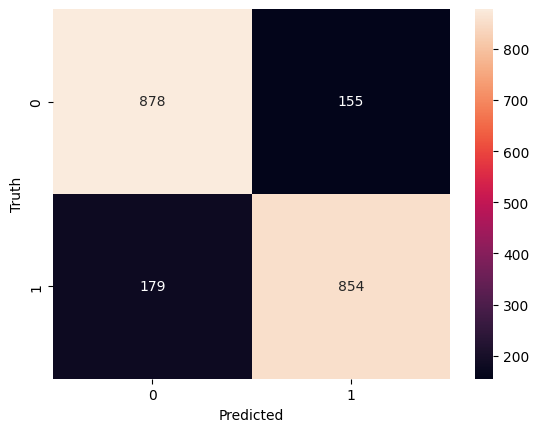

In [ ]:
sns.heatmap(cm_log_reg, annot=True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

<h1 style = "font-size: 25px;">DECISION TREE -</h1>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(classification_report_dt)
print("Accuracy : ", accuracy_dt)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.81      0.82      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

Accuracy :  0.8131655372700871


Text(50.722222222222214, 0.5, 'Truth')

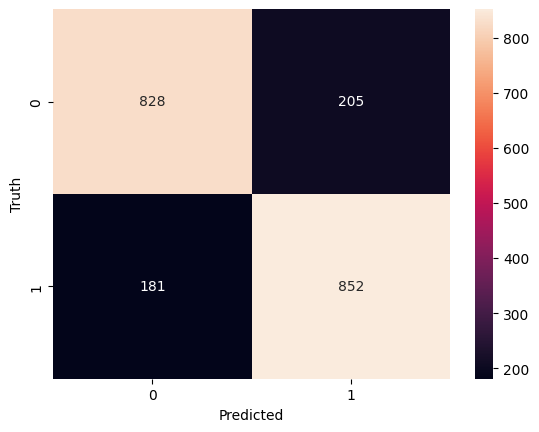

In [ ]:
sns.heatmap(cm_dt, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

<h1 style="font-size:25px;">RANDOM FOREST -</h1>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(classification_report_rf)
print("Accuracy : ", accuracy_rf)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.84      0.86      0.85      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Accuracy :  0.8484995159728945


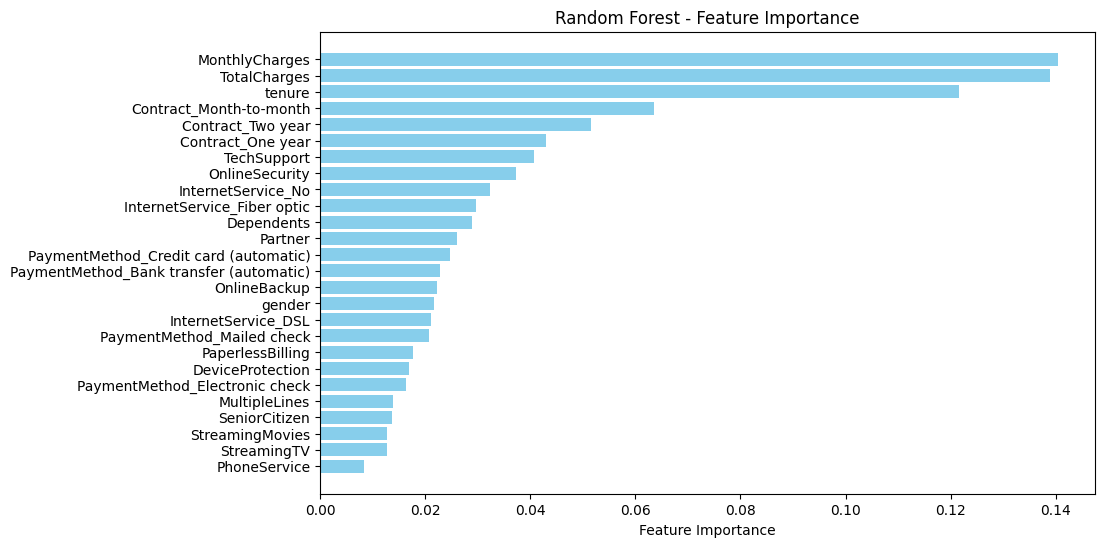

In [ ]:
importances = rf_model.feature_importances_
features = X_sm.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()

<h1 style="font-size: 25px">KNN -</h1>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

classification_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(classification_report_knn)
print("Accuracy : ", accuracy_knn)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1033
           1       0.74      0.82      0.78      1033

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066

Accuracy :  0.7642787996127783


<h1 style="font-size:25px;">XGBOOST -</h1>

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric = 'logloss', random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

classification_report_xgb = classification_report(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(classification_report_xgb)
print("Accuracy : ", accuracy_xgb)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.85      0.85      0.85      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Accuracy :  0.8494675701839303


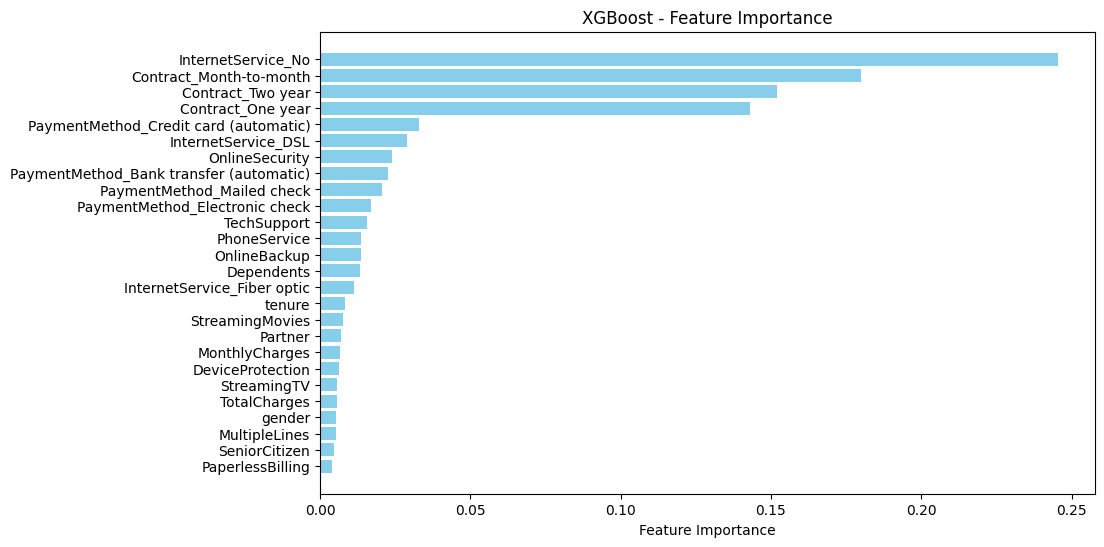

In [ ]:
importances = xgb_model.feature_importances_
features = X_train.columns
imp_feat_df = pd.DataFrame({'Feature' : features , 'Importance' : importances}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(imp_feat_df['Feature'], imp_feat_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("XGBoost - Feature Importance")
plt.show()

<h1 style="font-size:25px;">USING NEURAL NETWORK -</h1>

In [ ]:
len(X_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input

model = keras.Sequential([
    Input(shape=(26,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5702 - loss: 74.6929
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7176 - loss: 1.0496
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7506 - loss: 0.7212
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7574 - loss: 0.7176
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7319 - loss: 1.2431
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7379 - loss: 1.1205
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7718 - loss: 0.7054
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7754 - loss: 0.6727
Epoch 9/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7818 - loss: 0.6221
Epoch 10/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7710 - loss: 0.8130
Epoch 11/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7537 - loss: 1.2109
Epoch 12/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [ ]:
model.evaluate(X_test, y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7257 - loss: 1.1031


[1.0355066061019897, 0.7405614852905273]

In [ ]:
yp = model.predict(X_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
yp[:5]

array([[9.2215466e-01],
       [8.8359290e-01],
       [5.3594347e-02],
       [4.4195800e-05],
       [5.1740176e-06]], dtype=float32)

In [ ]:
y_test[:5]

,Churn
7310,1
9578,1
9370,1
3366,0
1250,0


In [ ]:
y_pred_ann = [ ]
for ele in yp:
    if ele > 0.5:
        y_pred_ann.append(1)
    else:
        y_pred_ann.append(0)

In [ ]:
y_pred_ann[:5]

[1, 1, 0, 0, 0]

In [ ]:
print(classification_report(y_test, y_pred_ann))
print("Accuracy : ", accuracy_score(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78      1033
           1       0.87      0.56      0.68      1033

    accuracy                           0.74      2066
   macro avg       0.78      0.74      0.73      2066
weighted avg       0.78      0.74      0.73      2066

Accuracy :  0.7405614714424008


Text(50.722222222222214, 0.5, 'Truth')

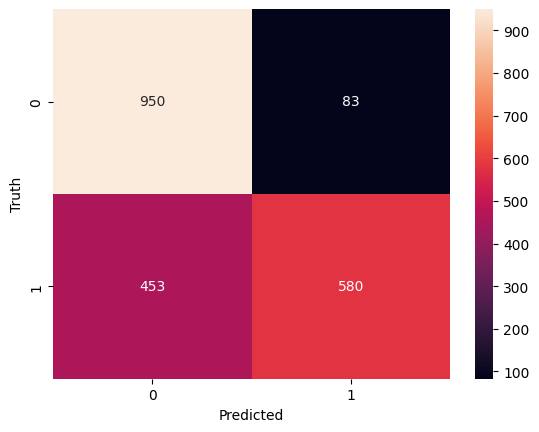

In [ ]:
cm_ann = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm_ann, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h1 style="font-size:25px;">MODEL COMPARISON</h1>

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
5                  ANN  0.740561   0.874811  0.561471  0.683962  0.849173
3                  KNN  0.764279   0.736979  0.821878  0.777117  0.834839
1        Decision Tree  0.813166   0.806055  0.824782  0.815311  0.813000
0  Logistic Regression  0.838335   0.846383  0.826718  0.836435  0.932008
2        Random Forest  0.848500   0.842857  0.856728  0.849736  0.933075
4              XGBoost  0.849468   0.852539  0.845111  0.848809  0.935413


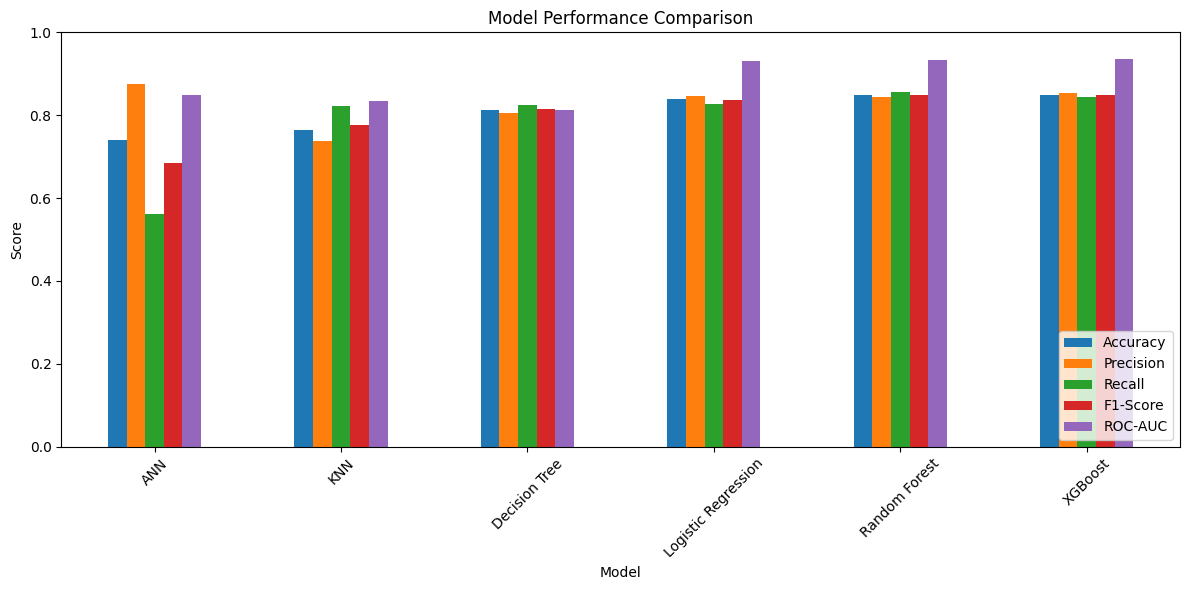

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

model_objects = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "KNN": knn_model,
    "XGBoost": xgb_model,
    "ANN": model
}

models = {
    "Logistic Regression": y_pred_log_reg,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "XGBoost": y_pred_xgb,
    "ANN": y_pred_ann
}

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for name, preds in models.items():
    accuracy_list.append(accuracy_score(y_test, preds))
    precision_list.append(precision_score(y_test, preds))
    recall_list.append(recall_score(y_test, preds))
    f1_list.append(f1_score(y_test, preds))
    if name == "ANN":
        probs = model_objects[name].predict(X_test)
    else:
        probs = model_objects[name].predict_proba(X_test)[:, 1]
    roc_auc_list.append(roc_auc_score(y_test, probs))

results_df = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1-Score": f1_list,
    "ROC-AUC": roc_auc_list
}).sort_values(by="Accuracy", ascending=True)

print(results_df)

results_df.set_index("Model").plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()